In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
     accuracy_score, confusion_matrix, precision_score,
     recall_score,f1_score, roc_auc_score, roc_curve)

In [ ]:
#1.	Загрузить данные и вывести первые 10 строк.
df = pd.read_csv('test_data_loan.csv')
df.head(10)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   
5      13500000          10           319                    6800000   
6      33000000           4           678                   22500000   
7      15000000          20           382                   13200000   
8       2200000          20           782                    1300000   
9       4300000          10           388                    3200000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   
5                   8300000              13700000            5100000   
6                  14800000              29200000            4300000   
7                   5700000              11800000            6000000   
8                    800000               2800000             600000   
9                   1400000               3300000            1600000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected  
5     Rejected  
6     Approved  
7     Rejected  
8     Approved  
9     Rejected

In [ ]:
#2.	Проверить размер датасета.
df.shape

(4269, 13)

In [ ]:
#3.	Получить информацию о типах данных .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
#4.	Посмотреть описательную статистику .
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [ ]:
#5.	Проверить уникальные значения в: education, self_employed, loan_status.
columns = [' education', ' self_employed', ' loan_status']
for column in columns:
    print(df[column].unique())

[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


In [ ]:
#6.	Рассчитать средние значения:
#o	income_annum, loan_amount, loan_term, cibil_score
print(df[' income_annum'].mean().round())
print(df[' loan_amount'].mean().round())
print(df[' loan_term'].mean().round())
print(df[' cibil_score'].mean().round())


5059124.0
15133450.0
11.0
600.0


In [ ]:
#7.	Найти минимумы и максимумы по активам:
#o	residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value
data = [' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']

for i in data:
    print(df[i].min())
    print()
    print(df[i].max())

-100000

29100000
0

19400000
300000

39200000
0

14700000


In [ ]:
#8.	Посчитать количество одобренных и отклонённых заявок.
df[' loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [ ]:
#9.	Рассчитать процентное соотношение Approved/Rejected.
df[' loan_status'].value_counts(normalize=True).round(2)

loan_status
Approved    0.62
Rejected    0.38
Name: proportion, dtype: float64

In [ ]:
#11.	Разделить income_annum и cibil_score на группы и проанализировать, в каких группах больше одобрений
df.groupby(' loan_status')[[' income_annum', ' cibil_score']].describe()

income_annum                                                   \
                    count          mean           std       min        25%   
 loan_status                                                                 
Approved           2656.0  5.025904e+06  2.827228e+06  200000.0  2600000.0   
Rejected           1613.0  5.113825e+06  2.772946e+06  200000.0  2800000.0   

                                              cibil_score              \
                    50%        75%        max       count        mean   
 loan_status                                                            
Approved      5000000.0  7500000.0  9900000.0      2656.0  703.461973   
Rejected      5100000.0  7500000.0  9900000.0      1613.0  429.468072   

                                                             
                     std    min    25%    50%    75%    max  
 loan_status                                                 
Approved      125.249016  300.0  618.0  711.0  803.0  900.0  
Rejected       78.401752  300.0  364.0  429.0  493.0  885.0

In [ ]:
#12.	Проанализировать зависимость одобрения от loan_term и активов.
df.groupby(' loan_status')[[' loan_term', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']].describe()

loan_term                                                   \
                 count       mean       std  min  25%   50%   75%   max   
 loan_status                                                              
Approved        2656.0  10.397590  5.879523  2.0  4.0  10.0  16.0  20.0   
Rejected        1613.0  11.728456  5.316127  2.0  8.0  12.0  16.0  20.0   

             residential_assets_value                ... luxury_assets_value  \
                                count          mean  ...                 75%   
 loan_status                                         ...                       
Approved                       2656.0  7.399812e+06  ...          21600000.0   
Rejected                       1613.0  7.592498e+06  ...          21800000.0   

                         bank_asset_value                                   \
                     max            count          mean           std  min   
 loan_status                                                                 
Approved      38600000.0           2656.0  4.959526e+06  3.273718e+06  0.0   
Rejected      39200000.0           1613.0  5.004960e+06  3.211871e+06  0.0   

                                                           
                    25%        50%        75%         max  
 loan_status                                               
Approved      2300000.0  4500000.0  7200000.0  14700000.0  
Rejected      2400000.0  4600000.0  7000000.0  14700000.0  

[2 rows x 40 columns]

<Axes: xlabel=' loan_term', ylabel='Count'>

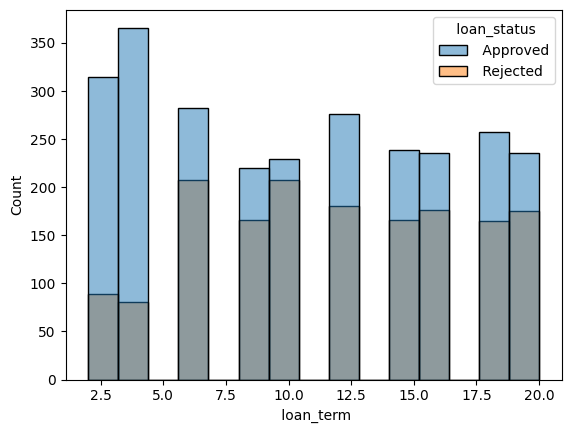

In [ ]:
sns.histplot(data=df, x=' loan_term', hue=' loan_status')

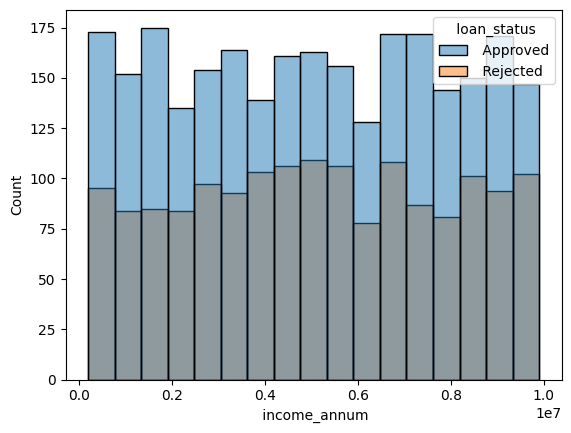

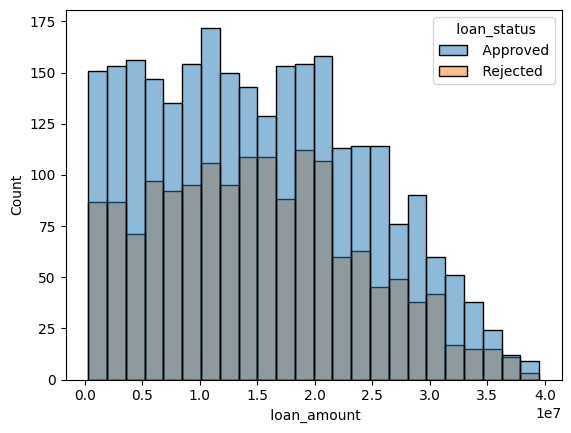

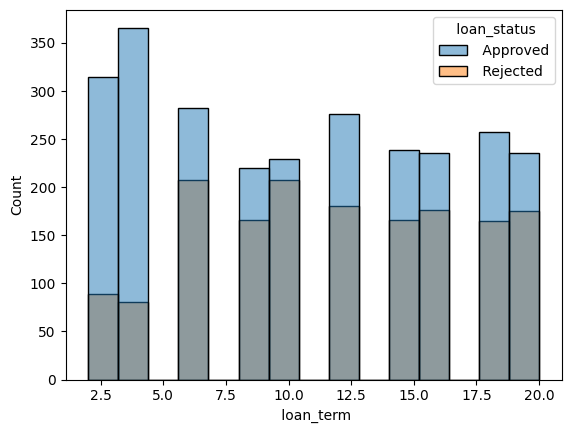

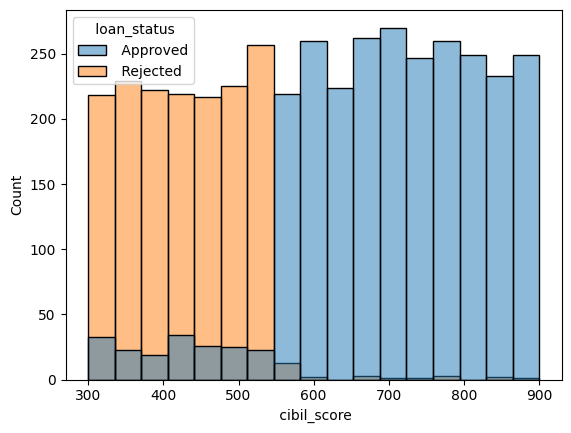

In [ ]:
#13.	Построить гистограммы для:
#o	income_annum, loan_amount, loan_term, cibil_score
cols = [' income_annum', ' loan_amount', ' loan_term', ' cibil_score']
for col in cols:
    sns.histplot(data=df, x=df[col], hue=' loan_status')
    plt.show()

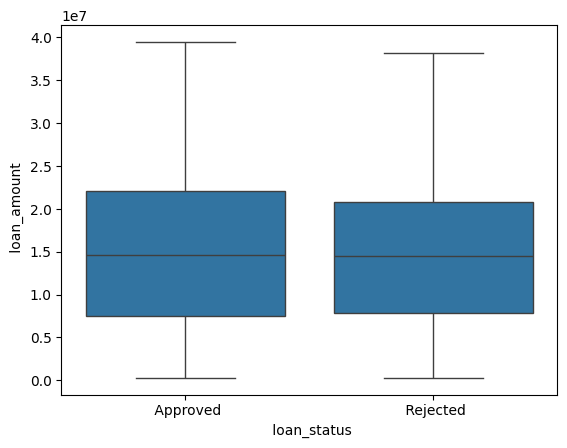

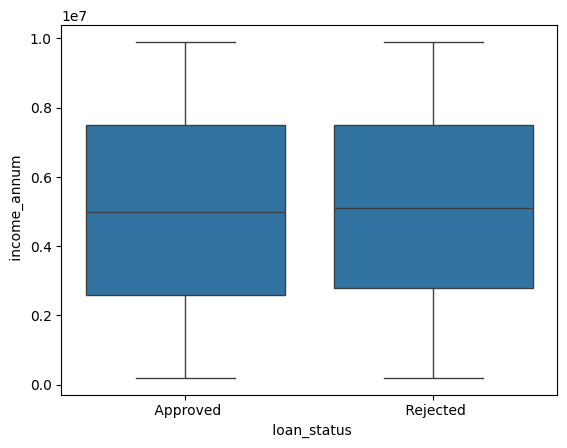

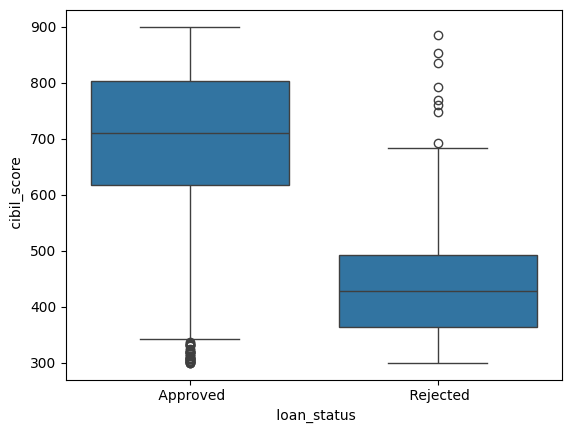

In [ ]:
#14.	Построить boxplot (по loan_status) для:
#o	loan_amount, income_annum, cibil_score
cols = [' loan_amount', ' income_annum', ' cibil_score']
for col in cols:
    sns.boxplot(data=df, x=' loan_status', y=df[col])
    plt.show()


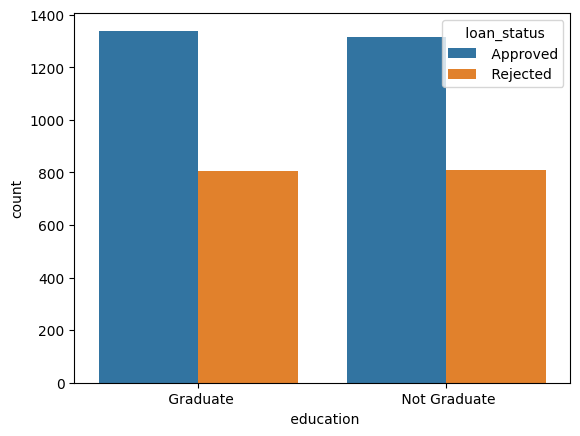

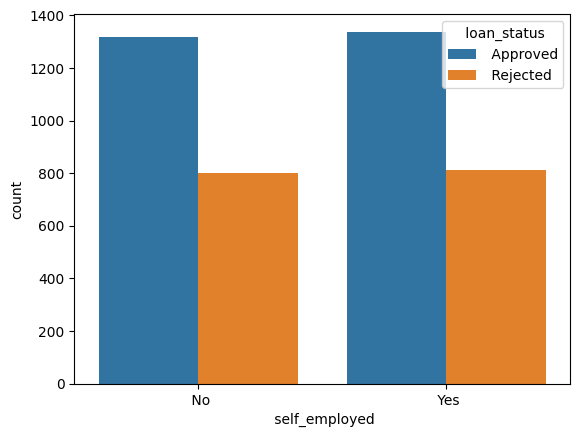

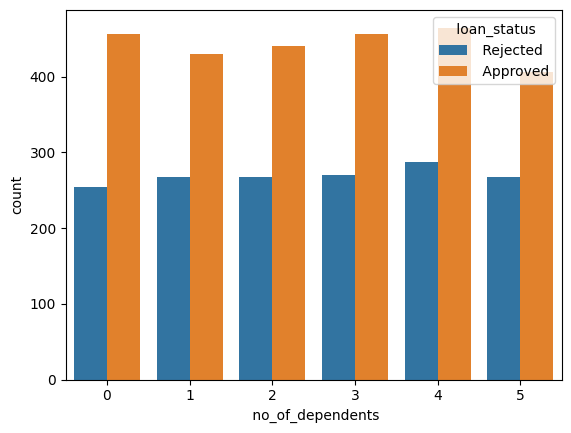

In [ ]:
#15.	Построить countplot для:
#o	education, self_employed, no_of_dependents по loan_status
cols = [' education', ' self_employed', ' no_of_dependents']
for col in cols:
    sns.countplot(data=df, x=df[col], hue=' loan_status')
    plt.show()


<Axes: >

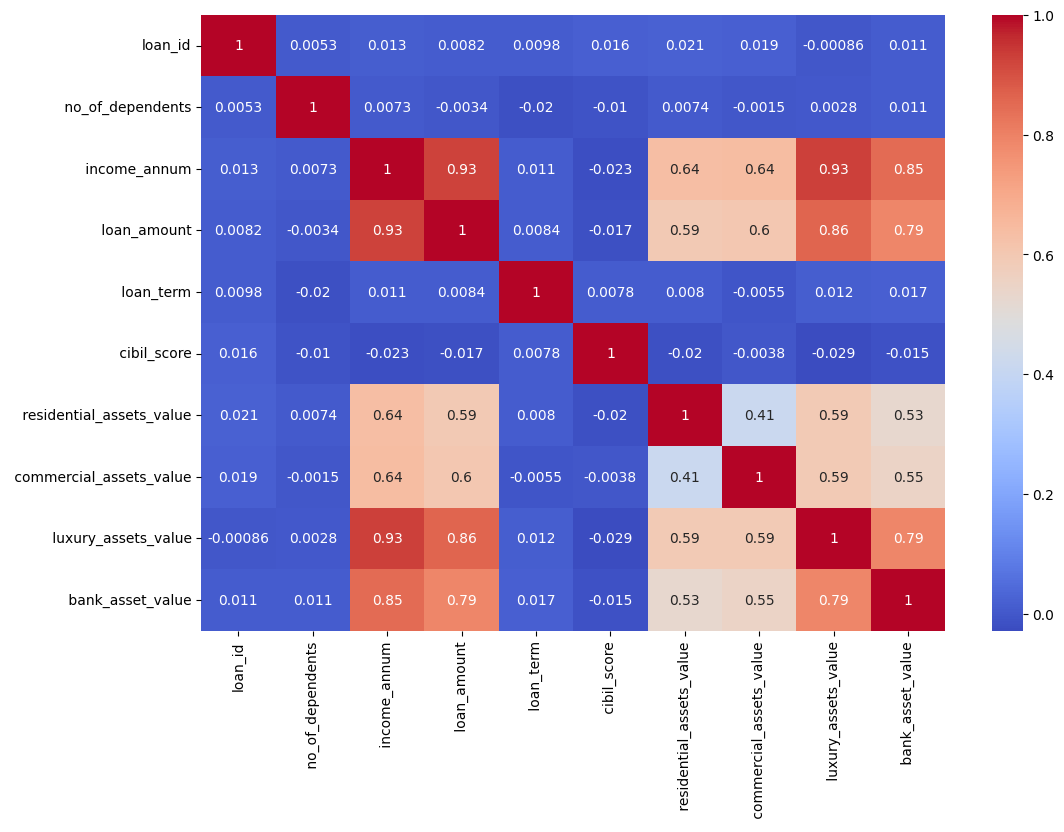

In [ ]:
#16.	Построить корреляционную матрицу и heatmap для числовых признаков.
numerics = df.select_dtypes(include=['int64'])
corr = numerics.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

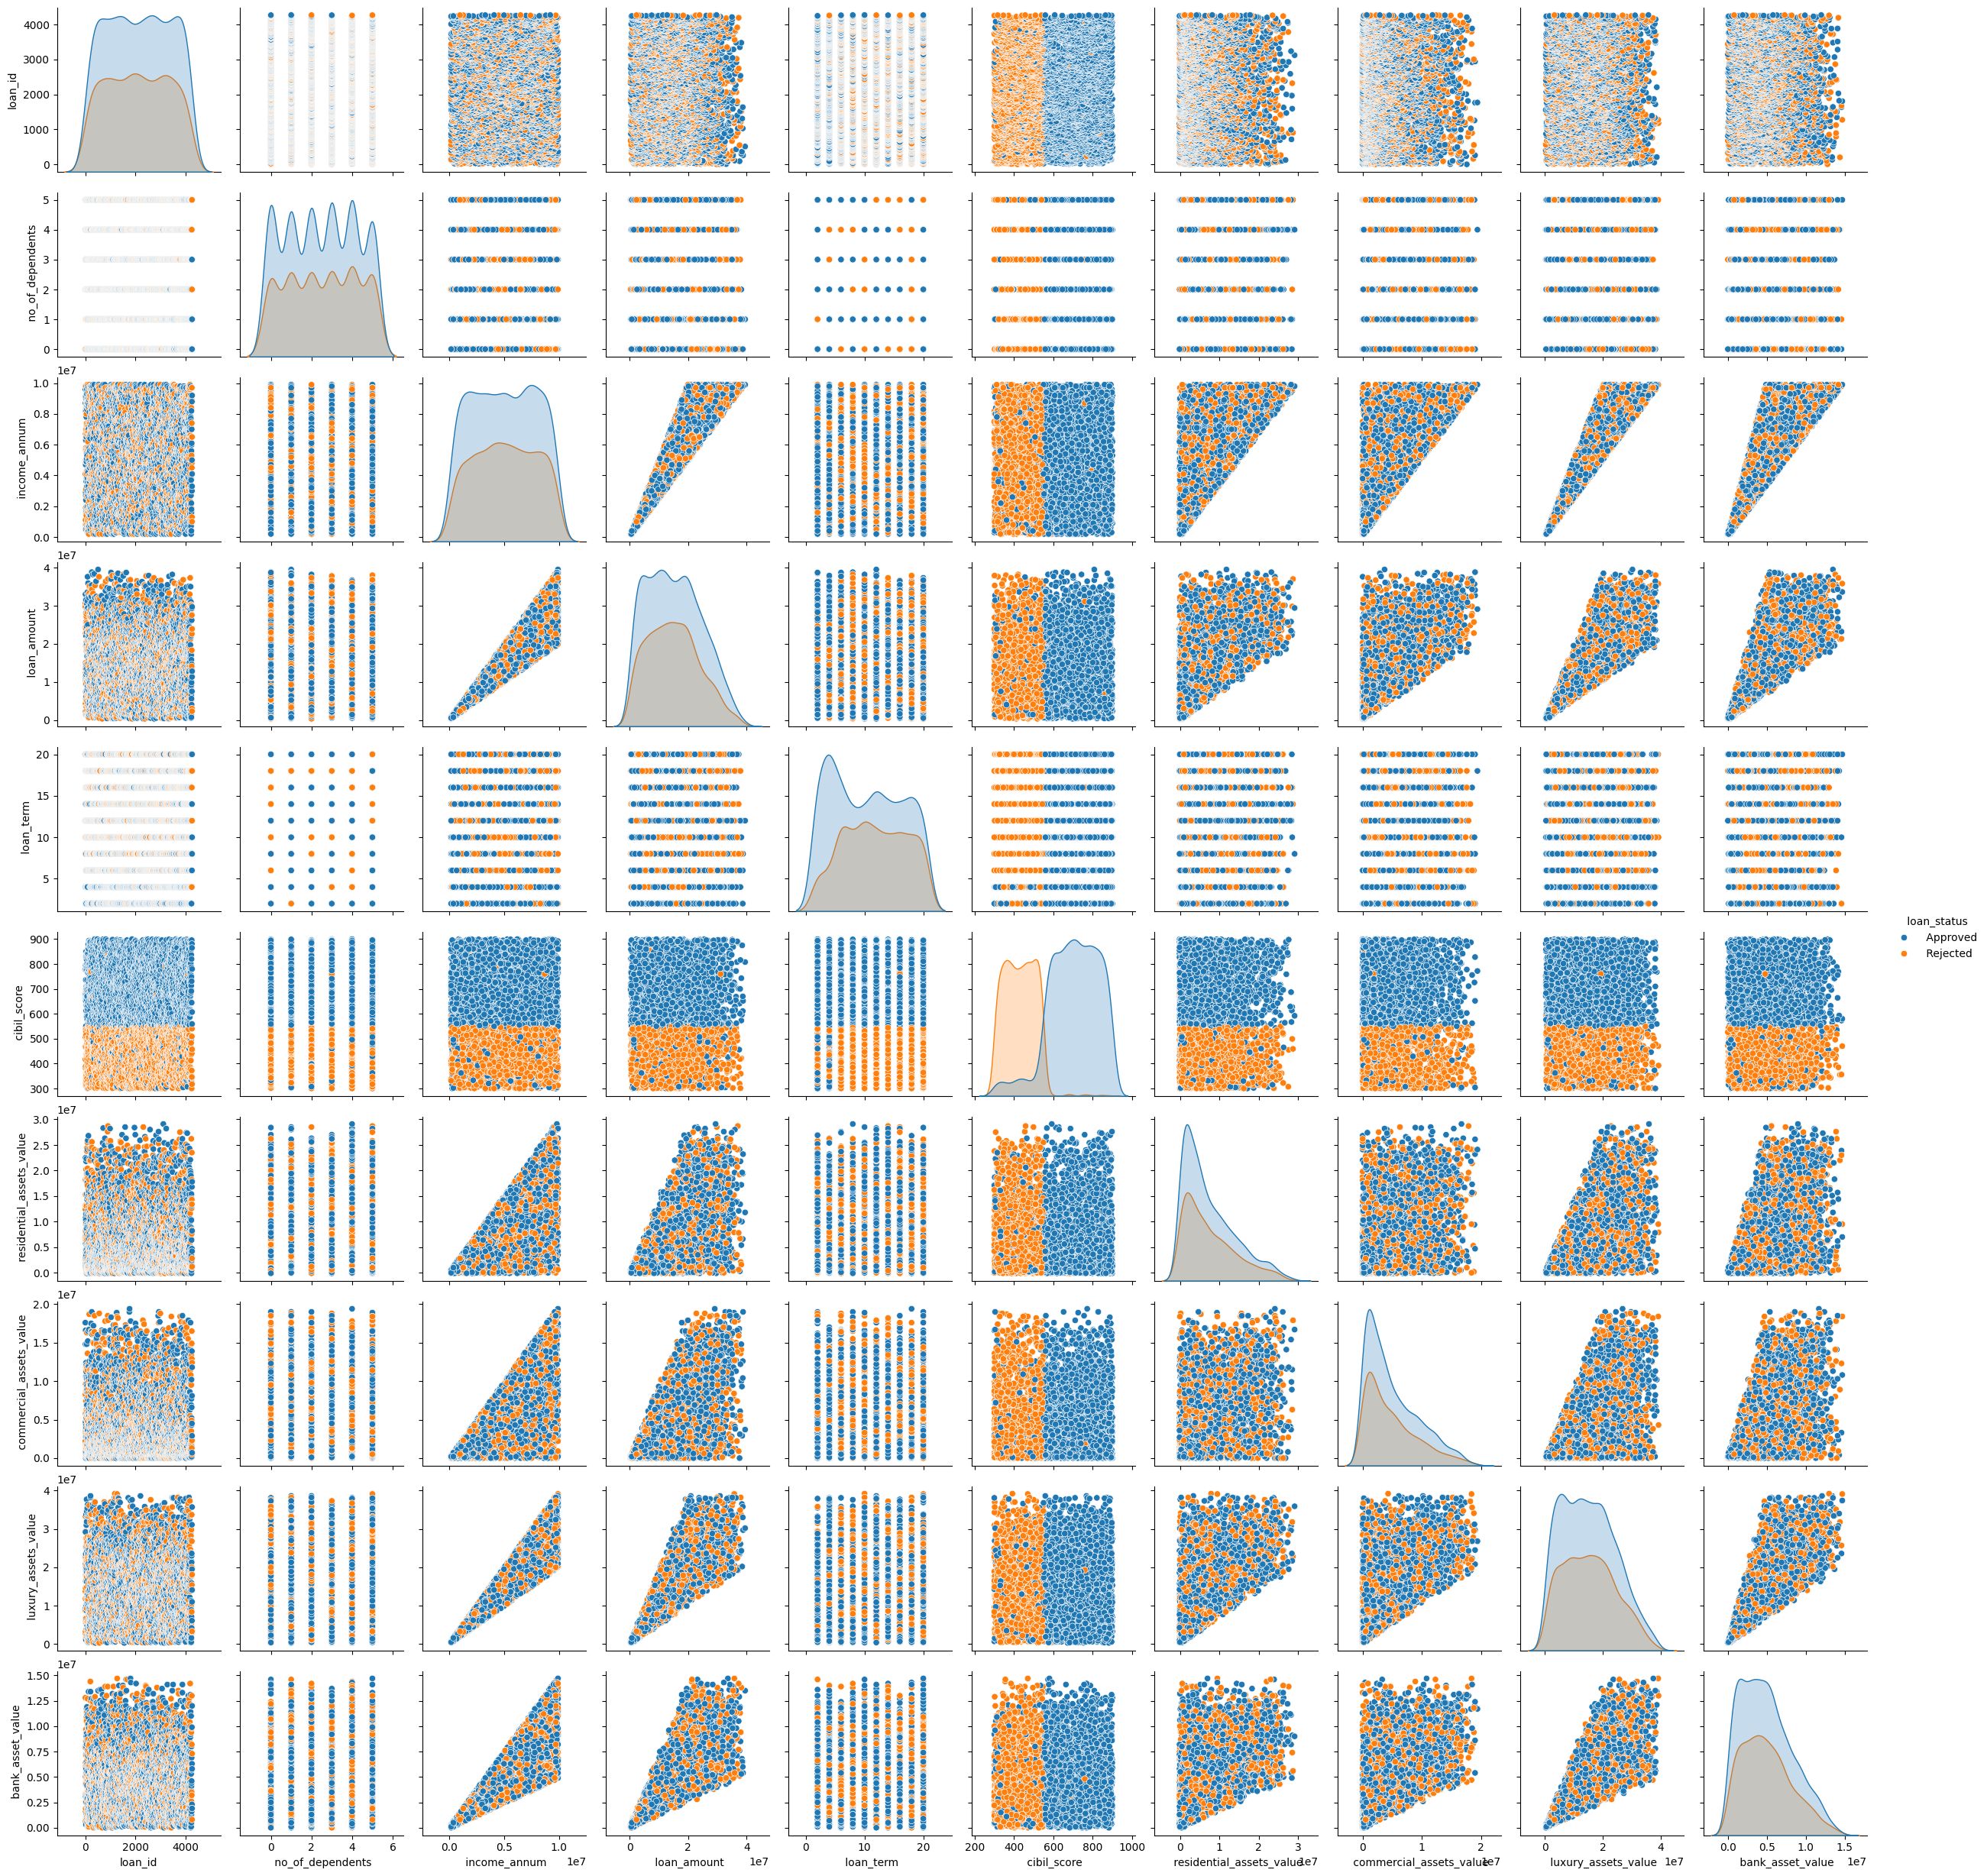

In [ ]:
#17.	Построить pairplot с расцветкой по loan_status.
sns.pairplot(df, hue=' loan_status')

In [ ]:
#18.	Обнаружить и обработать пропущенные значения.
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
#19.	Закодировать категориальные признаки:
#o	LabelEncoder или OneHotEncoder
from sklearn.preprocessing import LabelEncoder
df[' education'] = LabelEncoder().fit_transform(df[' education'])
df[' self_employed'] = LabelEncoder().fit_transform(df[' self_employed'])


In [ ]:
#20.	Масштабировать числовые признаки:
#o	StandardScaler или MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = df.drop(columns=[' loan_status'])
scaled = scaler.fit_transform(features)


In [ ]:
#21.	Разделить датасет на X и y
x = features
y = df[' loan_status']

In [ ]:
#22.	Разбить выборку на train/test (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ЭТАП 3: Построение и обучение моделей

# •	Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_log = model_log.predict(x_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

    Approved       0.64      0.94      0.76       536
    Rejected       0.53      0.11      0.18       318

    accuracy                           0.63       854
   macro avg       0.59      0.53      0.47       854
weighted avg       0.60      0.63      0.55       854



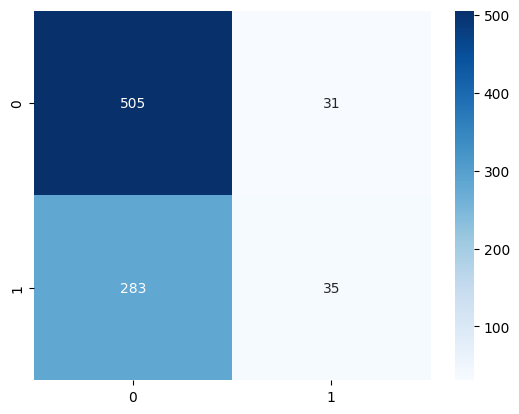

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True,  fmt ='d', cmap='Blues')
plt.show()

# •	Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 1, min_samples_split = 2)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred_tree = model_tree.predict(x_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

    Approved       0.99      0.95      0.97       536
    Rejected       0.92      0.99      0.95       318

    accuracy                           0.96       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.96      0.96       854



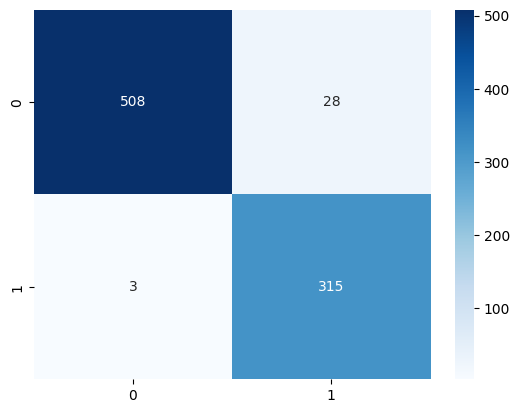

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt ='d',  cmap='Blues')
plt.show()

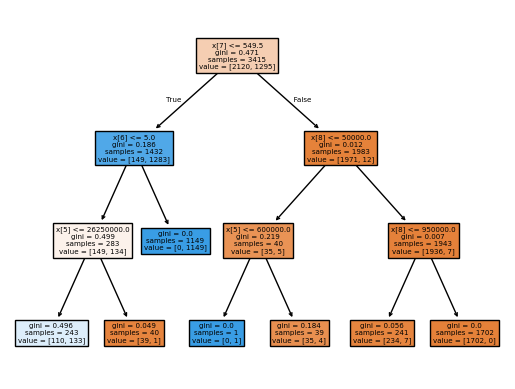

In [ ]:
plot_tree(model_tree, filled=True)
plt.show()

# Гиперпараметры Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [ ]:
print("Лучшие Гипперпараметры", grid_search.best_params_)

Лучшие Гипперпараметры {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


# •	Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

rf =  RandomForestClassifier(criterion = 'gini', max_depth =  5, min_samples_leaf = 1, min_samples_split = 2, n_estimators =  100)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

    Approved       0.97      0.99      0.98       536
    Rejected       0.97      0.94      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



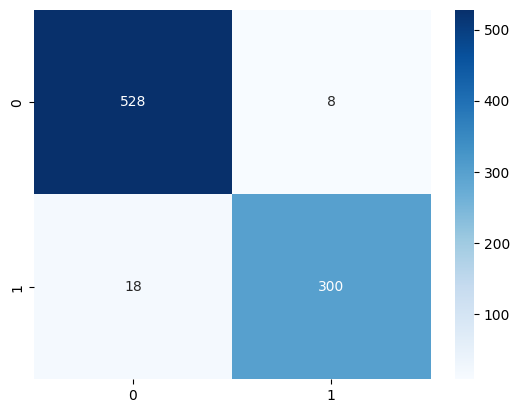

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt ='d',  cmap='Blues')
plt.show()

# Гиперпараметры RF

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10 , None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1

)

grid_rf.fit(x_train, y_train)
print("Лучшие параметры случайного леса:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Лучшие параметры случайного леса: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# •	Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

model_svc = SVC()

In [ ]:
model_svc.fit(x_train, y_train)


SVC()

In [ ]:
y_predict_svc = model_svc.predict(x_test)
print(classification_report(y_test, y_predict_svc))

              precision    recall  f1-score   support

    Approved       0.63      1.00      0.77       536
    Rejected       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


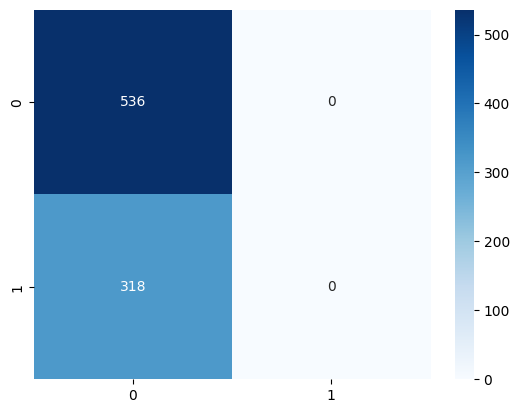

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predict_svc), annot=True, fmt ='d',  cmap='Blues')
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict_knn = model_svc.predict(x_test)
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

    Approved       0.63      1.00      0.77       536
    Rejected       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


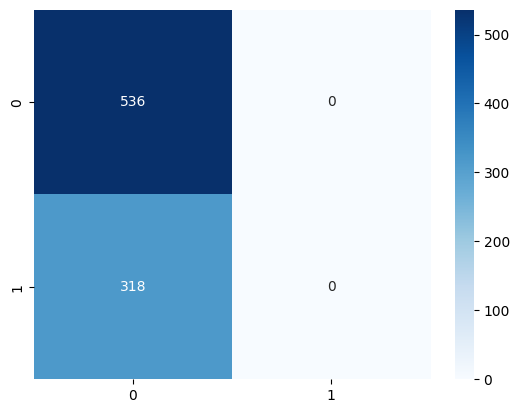

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predict_knn), annot=True, fmt ='d',  cmap='Blues')
plt.show()